### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
library("ggplot2")

In [2]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**Your question 1 goes here.**

In [6]:
# question 1. 
# what is the most common start stations?

In [7]:
# function to calculate the most common start station for a particular city
mcss <- function(city_data) {
    Start.Stations <- city_data$Start.Station
    stations_table <- table(Start.Stations)
    df <- as.data.frame(stations_table)
    names(df)[1] = "Start.Station"
    return (df[df$Freq == max(df$Freq), ])
}

In [8]:
start_station_counts <- function(city_data) {
    aggregated_data <- aggregate(city_data$Start.Station, by=list(city_data$Start.Station), FUN=length)
    names(aggregated_data)[1] = "Start.Station"
    names(aggregated_data)[2] = "Freq"
    counts <- aggregated_data[2:nrow(counts), ]
    row.names(counts) <- NULL
    return (counts[order(-counts$Freq), ])
}

In [9]:
plot_start_station_counts <- function(counts_data, plot_title) {
    g <- ggplot(aes(Start.Station, Freq), data=counts_data)
    g + geom_col() + labs(title=plot_title)
}

In [10]:
# for Washington
mcss_wash <- mcss(wash)
mcss_wash

,Start.Station,Freq
210,Columbus Circle / Union Station,1700


In [11]:
# for New York
mcss_ny <- mcss(ny)
mcss_ny

,Start.Station,Freq
467,Pershing Square North,592


In [12]:
# for Chicago
mcss_chi <- mcss(chi)
mcss_chi

,Start.Station,Freq
422,Streeter Dr & Grand Ave,210


In [13]:
# binding all three
combined_mcss <- rbind(mcss_wash, mcss_ny, mcss_chi)
combined_mcss

,Start.Station,Freq
210,Columbus Circle / Union Station,1700
467,Pershing Square North,592
422,Streeter Dr & Grand Ave,210


In [14]:
combined_mcss

,Start.Station,Freq
210,Columbus Circle / Union Station,1700
467,Pershing Square North,592
422,Streeter Dr & Grand Ave,210


In [43]:
combined_mcss

,Start.Station,Freq
210,Columbus Circle / Union Station,1700
467,Pershing Square North,592
422,Streeter Dr & Grand Ave,210


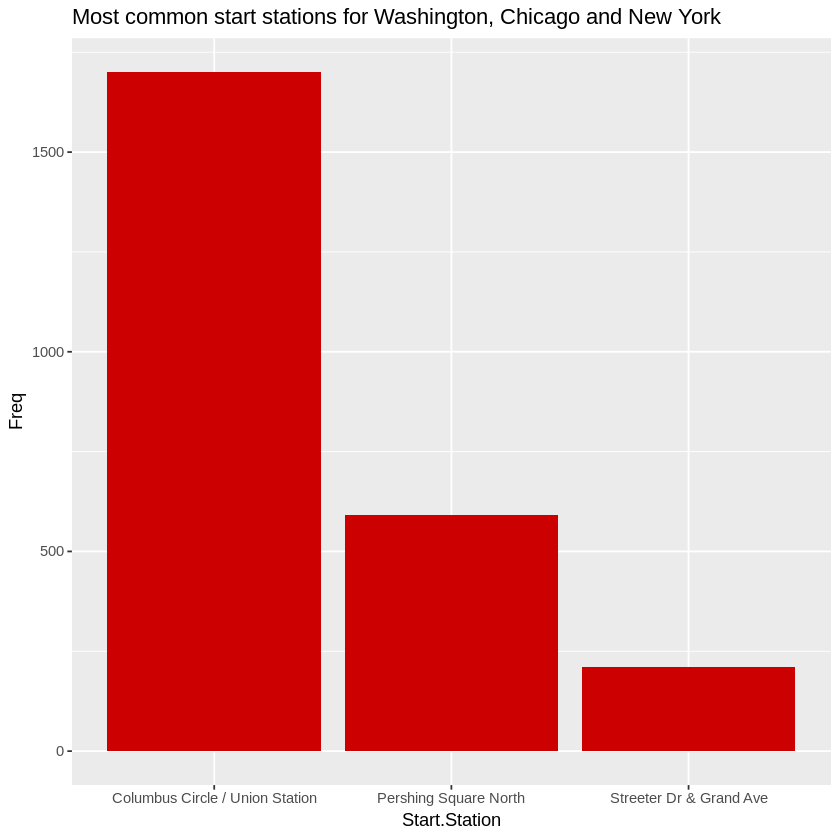

In [19]:
g <- ggplot(aes(Start.Station, Freq), data=combined_mcss)
g + geom_col(fill="#cc0000") + labs(title="Most common start stations for Washington, Chicago and New York")

**Summary of your question 1 results goes here.**

***
From the above dataframes, it can be deduced that, for:
1. Washington, Columbus Circle / Union Station is the most common start station
2. Chicago, Streeter Dr & Grand Ave is the most common start station
3. New York, Pershing Square North is the most common start station
***

### Question 2

**Your question 2 goes here.**

In [20]:
# Your solution code goes here
# Question: What are the counts of each user type?

In [29]:
user_counts <- function(city_data) {
    aggregated_data <- aggregate(city_data$User.Type, by=list(city_data$User.Type), FUN=length)
    names(aggregated_data)[1] = "User.Type"
    names(aggregated_data)[2] = "Count"
    row.names(aggregated_data) <- NULL
    return (aggregated_data[2:nrow(aggregated_data), ])
}

In [50]:
(ny_user_types <- user_counts(ny)) # user counts for new york

,User.Type,Count
2,Customer,5558
3,Subscriber,49093


In [51]:
(chi_user_types <- user_counts(chi)) # user counts for chicago

,User.Type,Count
2,Customer,1746
3,Subscriber,6883


In [52]:
(wash_user_types <- user_counts(wash)) # user counts for washington

,User.Type,Count
2,Customer,23450
3,Subscriber,65600


**Visualizations for Question 2**

In [92]:
# Function to plot for each city
plot_user_type_counts <- function(city_data, color) {
    return (ggplot(aes(User.Type, Count), data=user_counts(city_data)) + geom_col(fill=color))
}

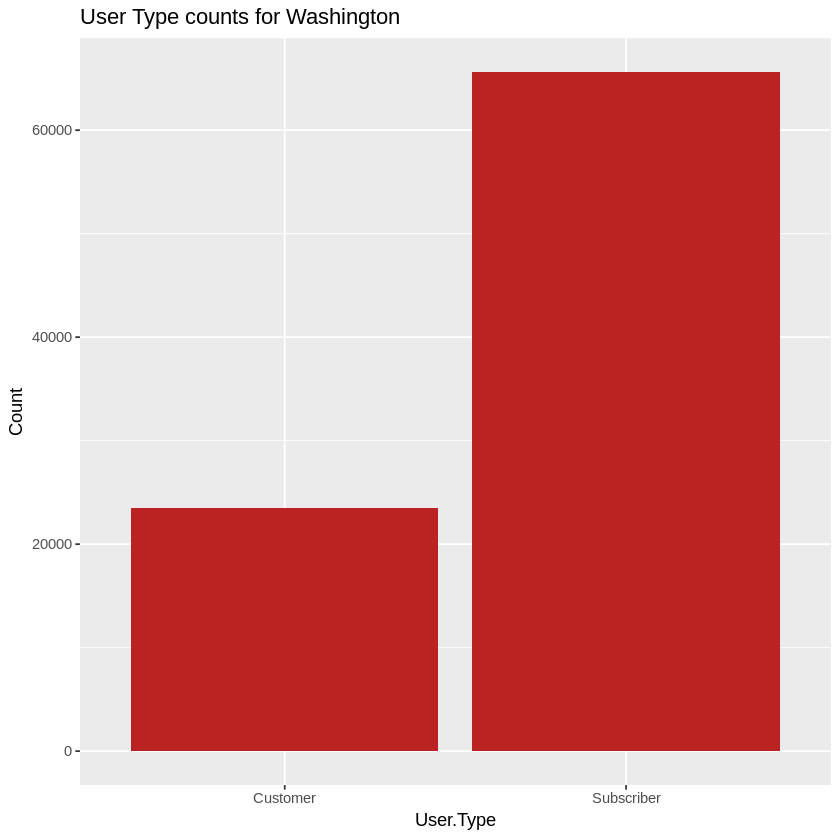

In [93]:
(wash_plt_user_type <- plot_user_type_counts(wash, color="#bb2222") + labs(title="User Type counts for Washington"))

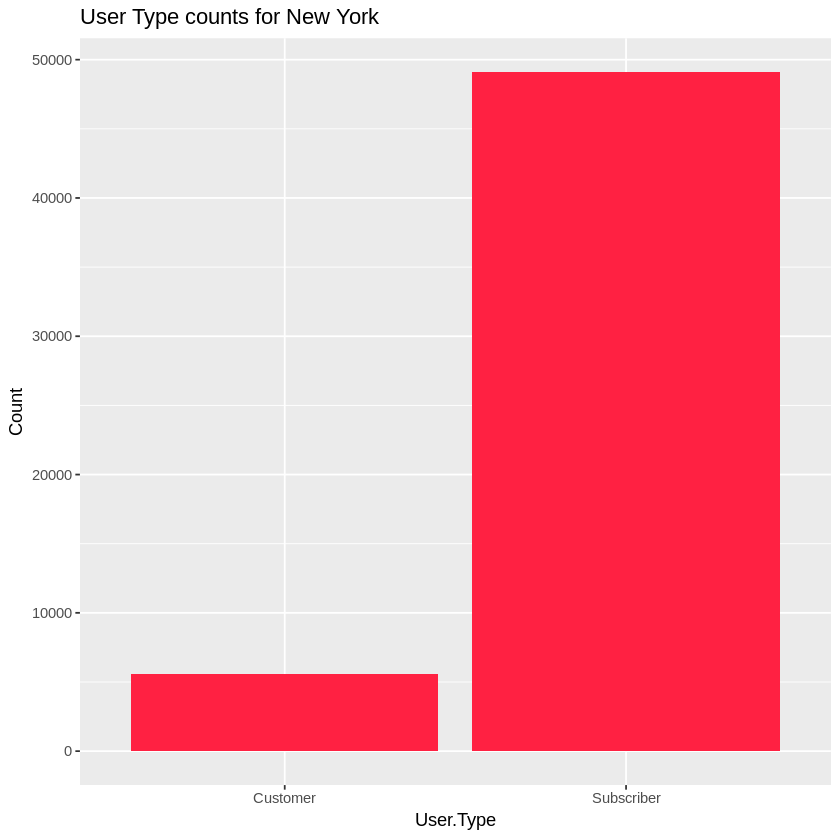

In [94]:
(ny_plt_user_type <- plot_user_type_counts(ny, color="#ff2142") + labs(title="User Type counts for New York"))

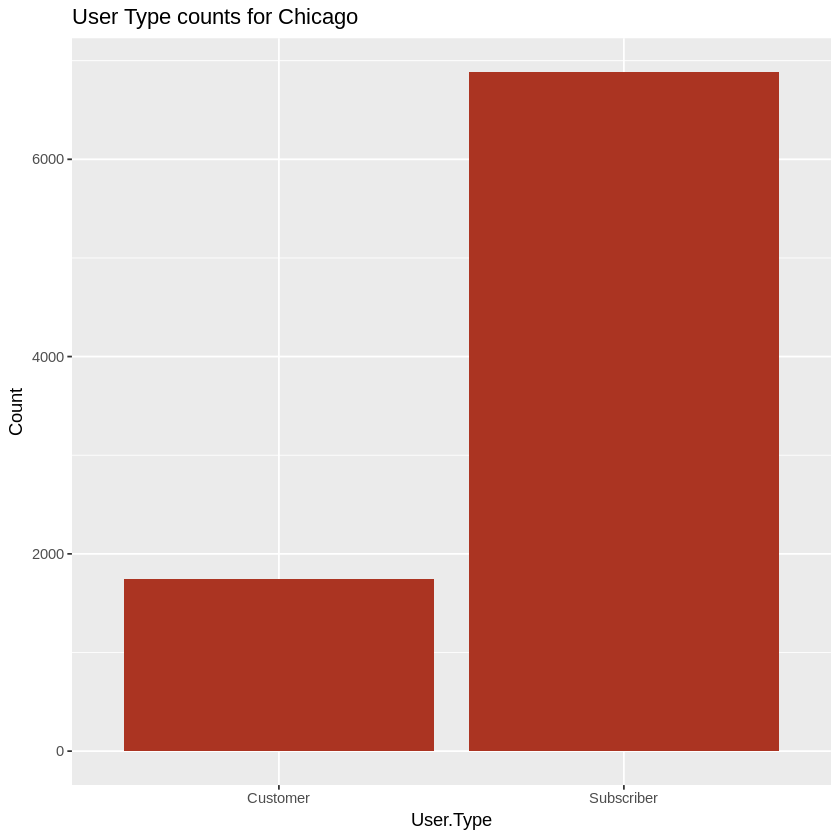

In [95]:
(chi_plt_user_type <- plot_user_type_counts(chi, color="#ab3422") + labs(title="User Type counts for Chicago"))

In [96]:
cities <- rep(c("Washington" , "New York" , "Chicago") , each=2)
data <- rbind(wash_user_types, ny_user_types, chi_user_types)
data.frame(data, cities)

,User.Type,Count,cities
2,Customer,23450,Washington
3,Subscriber,65600,Washington
21,Customer,5558,New York
31,Subscriber,49093,New York
22,Customer,1746,Chicago
32,Subscriber,6883,Chicago


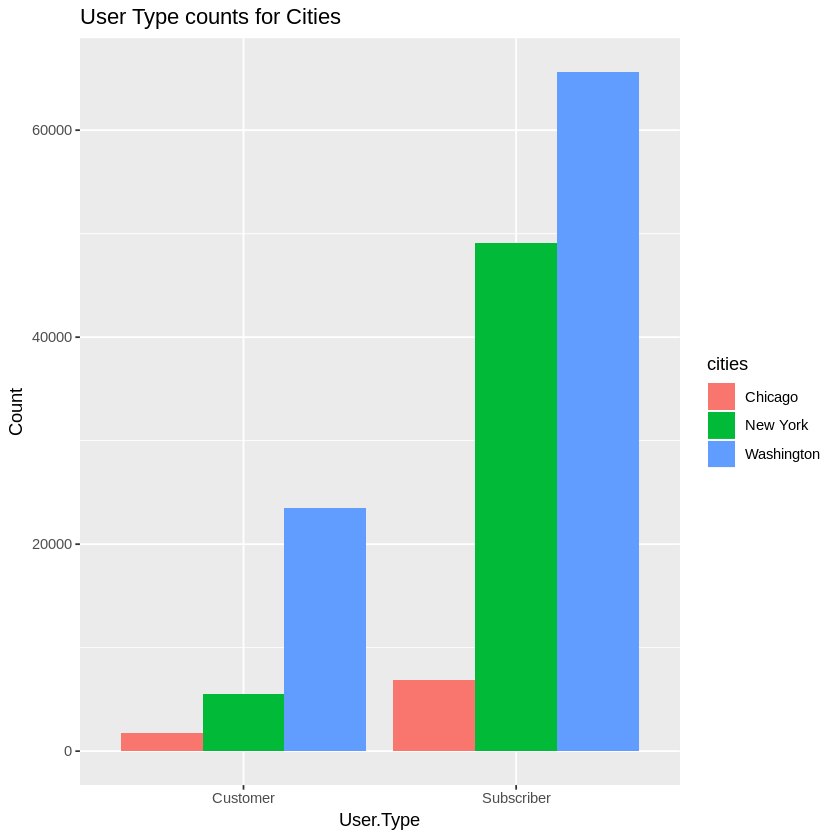

In [97]:
ggplot(data.m, aes(fill=cities, y=Count, x=User.Type)) + 
    geom_col(position="dodge") + labs(title="User Type counts for Cities")

**Summary of your question 2 results goes here.**

***
From the above visualizations:
     1. For New York, there are more subscribers than customers.
     2. For Chicago, there are more subscribers than customers.
     3. For Washington, there are more subscribers than customers.
     
     Hence, more Subscribers use the service than customers.
***

### Question 3

**Your question 3 goes here.**

In [ ]:
# Your solution code goes here
# What are the counts of each gender (only available for NYC and Chicago)

In [86]:
gc <- function(city_data) {
    aggregated_data <- aggregate(city_data$Gender, by=list(city_data$Gender), FUN=length)
    names(aggregated_data)[1] = "Gender"
    names(aggregated_data)[2] = "Count"
    return (aggregated_data[2: nrow(aggregated_data), ])
}

In [101]:
(df_ny_gender <- gc(ny)) # Gender counts for New York

,Gender,Count
2,Female,12159
3,Male,37201


In [104]:
(df_chi_gender <- gc(chi)) # Gender counts for Chicago

,Gender,Count
2,Female,1723
3,Male,5159


In [106]:
plot_gender_counts <- function(city_data, color) {
    return (ggplot(aes(Gender, Count), data=gc(city_data)) + geom_col(fill=color))
}

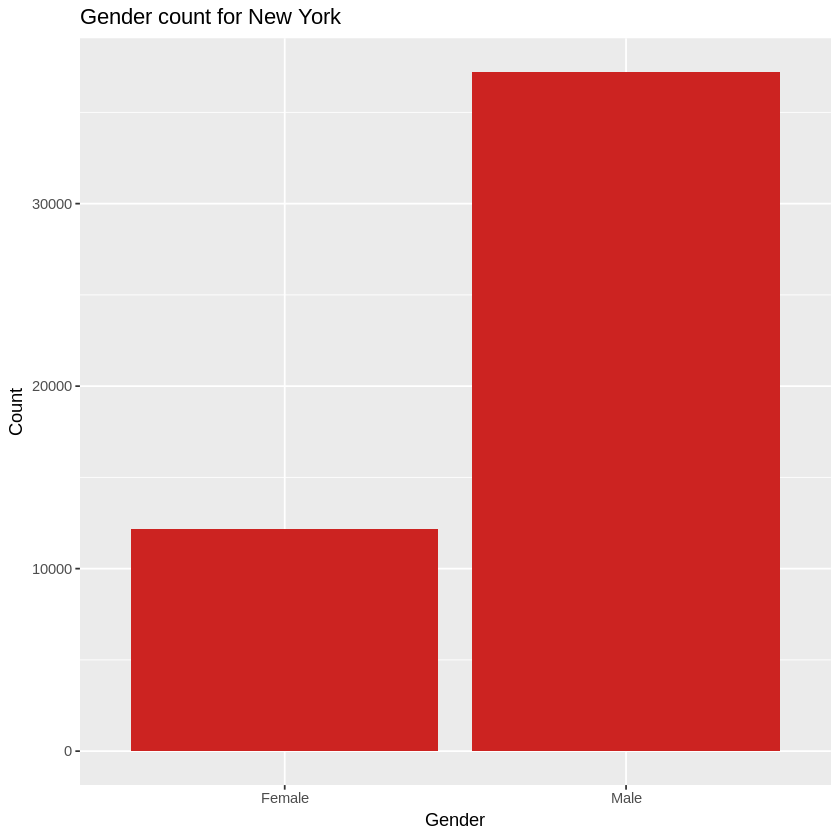

In [121]:
(plt_gc_ny <- plot_gender_counts(ny, color="#cc2321")) + labs(title="Gender count for New York") # gender count plot for New York

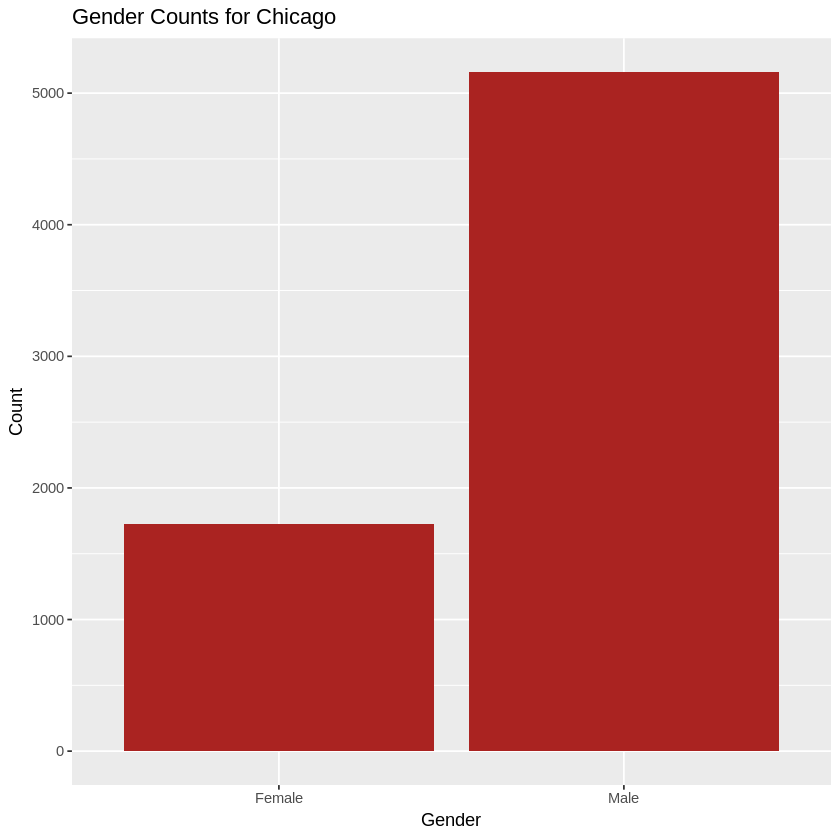

In [124]:
(plt_gc_chi <- plot_gender_counts(chi, color="#aa2321")) + labs(title="Gender Counts for Chicago") # gender count plot for Chicago

In [118]:
cities <- rep(c("Chicago" , "New York") , each=2)
data <- rbind(df_chi_gender, df_ny_gender)
(data.m <- data.frame(data, cities))

,Gender,Count,cities
2,Female,1723,Chicago
3,Male,5159,Chicago
21,Female,12159,New York
31,Male,37201,New York


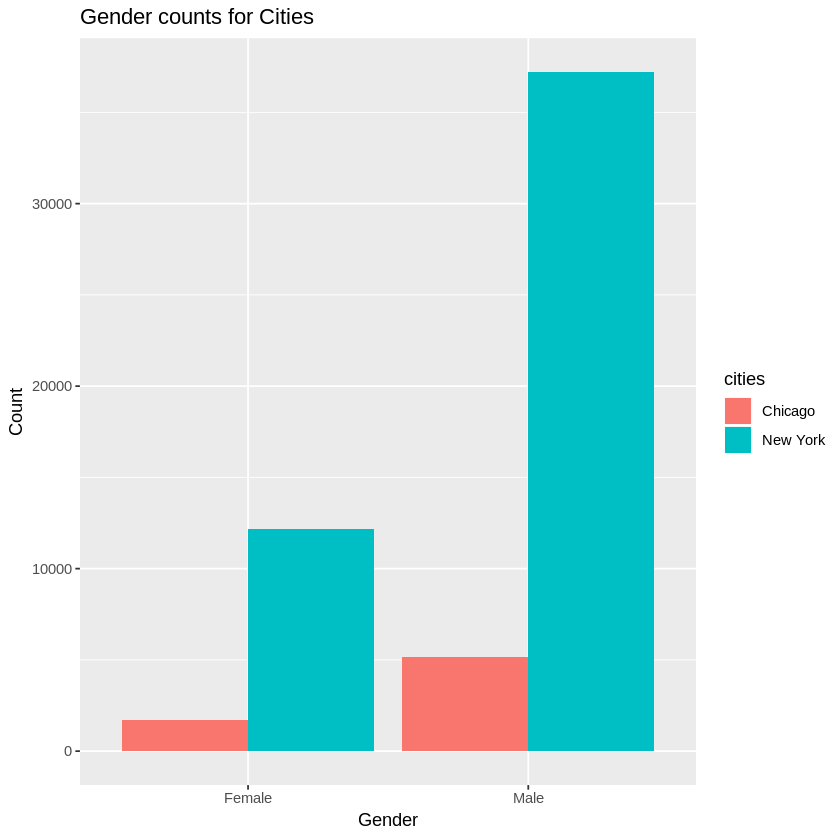

In [119]:
ggplot(data.m, aes(fill=cities, y=Count, x=Gender)) + 
    geom_col(position="dodge") + labs(title="Gender counts for Cities")

**Summary of your question 3 results goes here.**

***
From the visualizations above:
    1. For New York, there were more Male counts than females.
    2. For Chicago, there were also more Male counts than femals.
    Hence, more males use the service than females
***


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [125]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')